In [4]:
import pandas as pd

df = pd.read_csv('carData.csv')


df = df.dropna()

#calculer la médiane de la colonne 'price'
median_price = df['Selling_Price'].median()

#afficher les 10 premières lignes
print(df.head(10))
df.describe()




        Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0           ritz  2014           3.35           5.59       27000    Petrol   
1            sx4  2013           4.75           9.54       43000    Diesel   
2           ciaz  2017           7.25           9.85        6900    Petrol   
3        wagon r  2011           2.85           4.15        5200    Petrol   
4          swift  2014           4.60           6.87       42450    Diesel   
5  vitara brezza  2018           9.25           9.83        2071    Diesel   
6           ciaz  2015           6.75           8.12       18796    Petrol   
7        s cross  2015           6.50           8.61       33429    Diesel   
8           ciaz  2016           8.75           8.89       20273    Diesel   
9           ciaz  2015           7.45           8.92       42367    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Kms_Driven'}>],
       [<Axes: title={'center': 'Owner'}>, <Axes: >]], dtype=object)

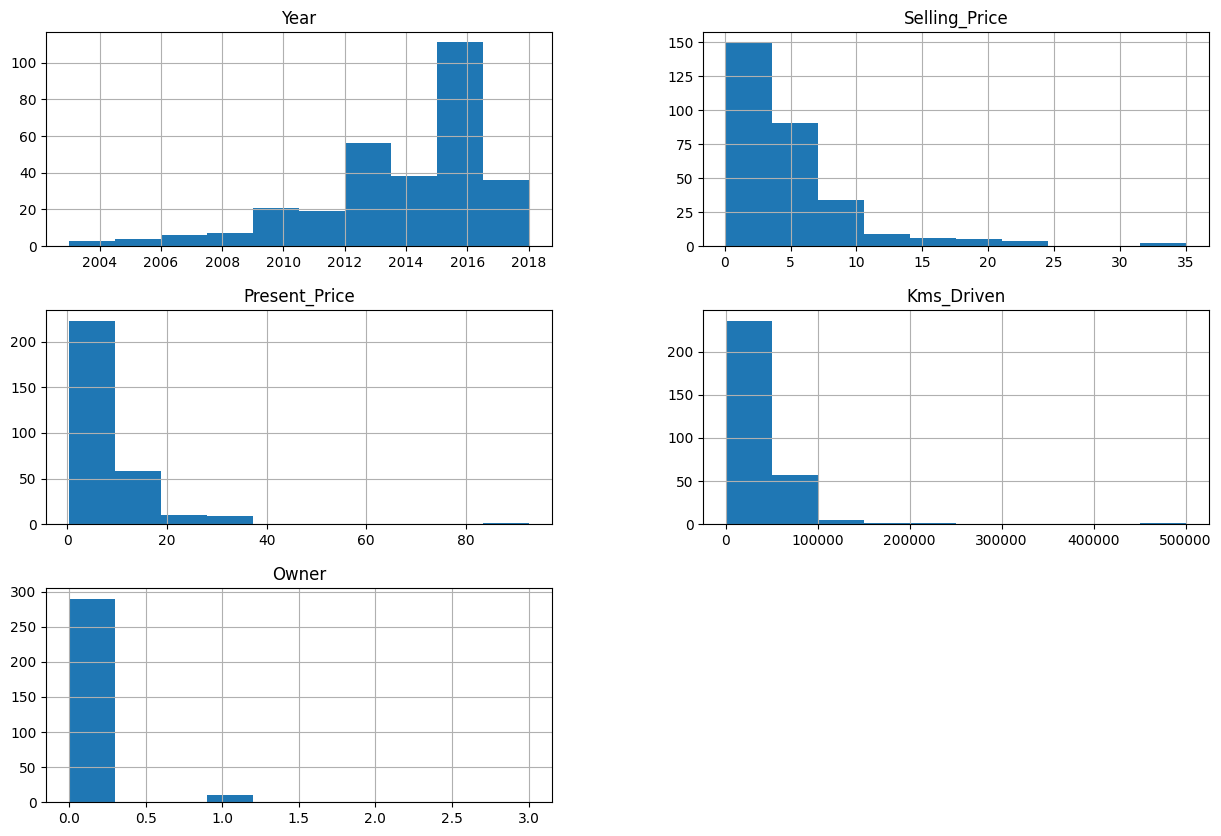

In [5]:
df.hist(figsize=(15,10))

# Analyse exploratoire Utilisant Matplotlib et Seaborn

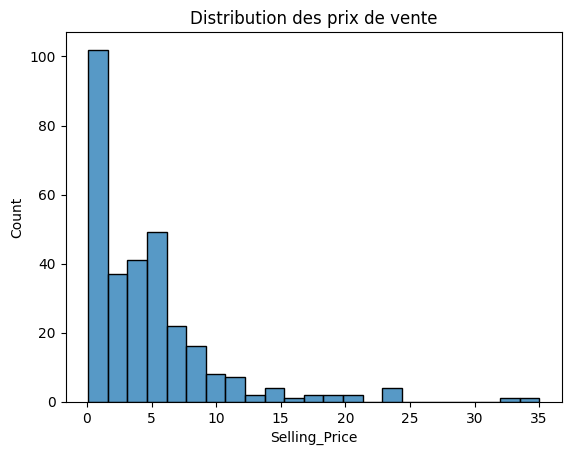

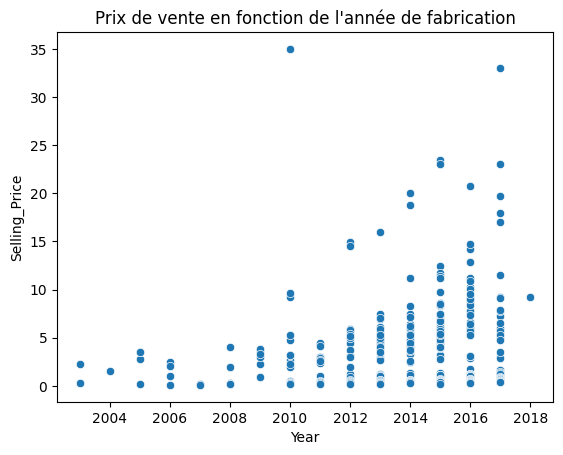

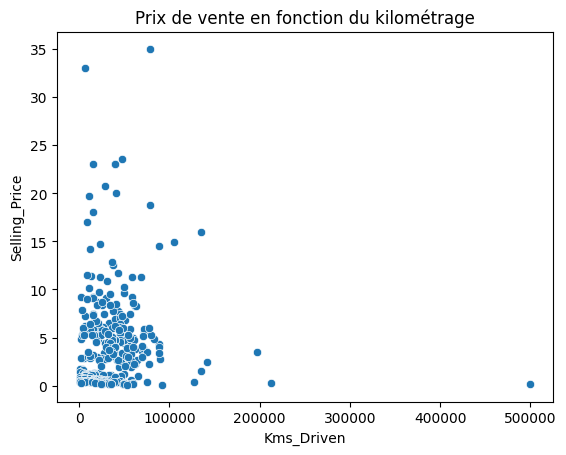

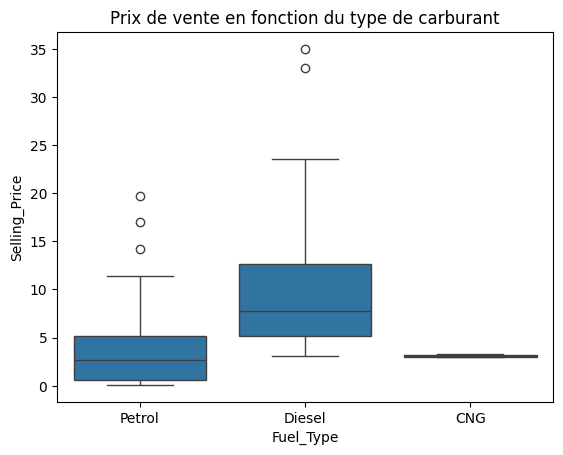

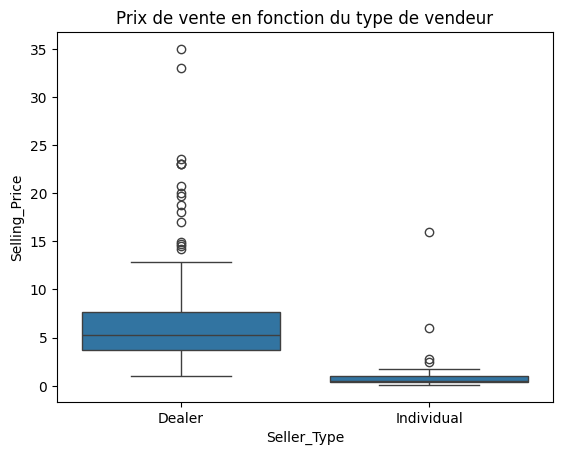

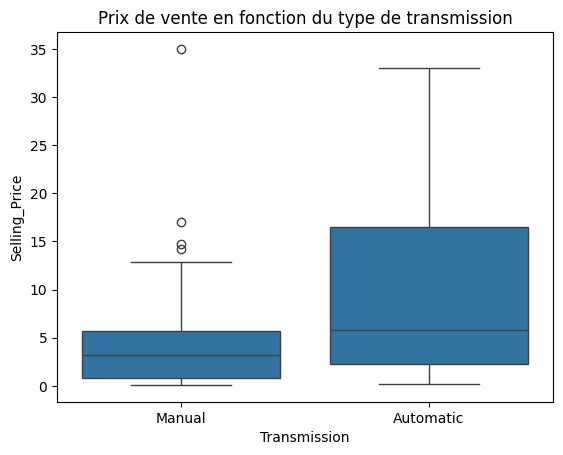

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse de la distribution des prix
sns.histplot(data=df, x='Selling_Price')
plt.title('Distribution des prix de vente')
plt.show()

# Corrélation entre le prix et l'année de fabrication
sns.scatterplot(data=df, x='Year', y='Selling_Price')
plt.title('Prix de vente en fonction de l\'année de fabrication')
plt.show()

# Impact du kilométrage sur le prix
sns.scatterplot(data=df, x='Kms_Driven', y='Selling_Price')
plt.title('Prix de vente en fonction du kilométrage')
plt.show()

# Différence de prix en fonction du type de carburant
sns.boxplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.title('Prix de vente en fonction du type de carburant')
plt.show()

# Influence du type de vendeur sur le prix
sns.boxplot(data=df, x='Seller_Type', y='Selling_Price')
plt.title('Prix de vente en fonction du type de vendeur')
plt.show()

# Prix en fonction de la transmission
sns.boxplot(data=df, x='Transmission', y='Selling_Price')
plt.title('Prix de vente en fonction du type de transmission')
plt.show()


# Visualisation de données utilisant Seaborn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


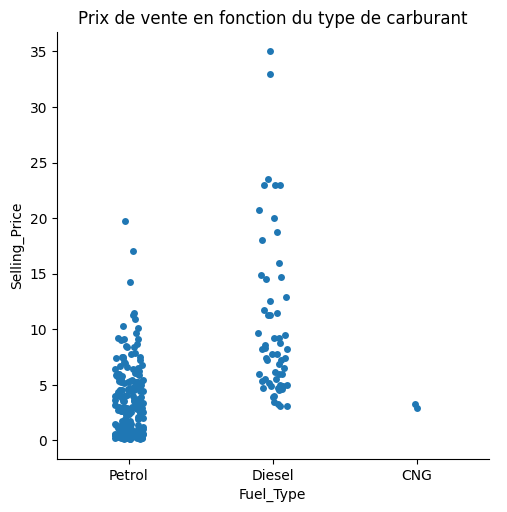

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


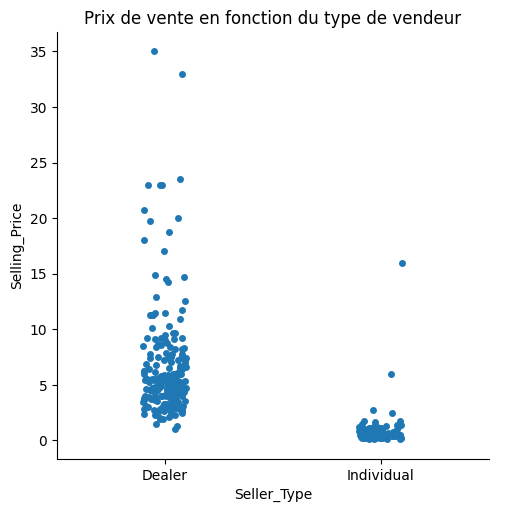

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualiser le prix de vente en fonction du type de carburant
sns.catplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Prix de vente en fonction du type de carburant')
plt.show()

# Visualiser le prix de vente en fonction du type de vendeur
sns.catplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Prix de vente en fonction du type de vendeur')
plt.show()


## Explication De l'Utilisation du Graphique Catplot

Le tracé catplot de Seaborn est un outil de visualisation qui permet de voir comment une variable numérique (comme le prix d’une voiture) change en fonction d’une variable catégorielle (comme le type de carburant ou le type de vendeur). C’est donc un excellent moyen de comprendre les relations entre différentes caractéristiques dans vos données.






# Algorithme de régression linéaire univariée avec Scikit-Learn

## 1 Creation du modèle, Evaluation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Définir les variables explicatives et la variable cible
X = df['Year'].values.reshape(-1, 1)
y = df['Selling_Price']

# Diviser le jeu de données en un jeu d'entraînement et un jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Prédire les prix sur le jeu de test
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Mean Squared Error:', rmse)

Mean Squared Error: 4.582537948169672


### Explication :

On utilise des outils de la bibliothèque sklearn pour construire un modèle qui va apprendre à estimer le prix de vente des voitures en fonction de l’année.

On divise les données en deux parties : une pour apprendre au modèle (entraînement) et une pour tester sa précision (test).

On crée un modèle de régression linéaire, qui est une façon simple de prédire une valeur numérique.

Après avoir entraîné le modèle avec les données d’entraînement, on l’utilise pour prédire les prix sur de nouvelles données.

Enfin, on calcule l’erreur de nos prédictions pour voir à quel point notre modèle est précis. Une erreur plus petite signifie de meilleures prédictions.


 ## 2 Test et Prédiction du modèle

In [14]:


annee = [[2010]] 

prix_predit = model.predict(annee)


print("Prix prédit pour l'année", annee, ":")
print(prix_predit)


prix_predit_all = model.predict(X)

r2 = r2_score(y, prix_predit_all)
print('R2:', r2)


Prix prédit pour l'année [[2010]] :
[3.20279961]
R2: 0.055542246897668845


### Explication :

On définit une année pour laquelle on veut prédire le prix de vente des voitures.

On utilise le modèle déjà entraîné pour faire cette prédiction.

On affiche le prix prédit pour l’année choisie.

Ensuite, on utilise toutes les données pour obtenir le coefficient de détermination ( R^2 ),qui indique à quel point les prédictions du modèle correspondent aux vrais prix.

 Plus le ( R^2 ) est proche de 1, mieux c’est. Cela nous donne une idée de la qualité globale du modèle.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# Convertir la variable catégorielle 'Transmission' en variable numérique
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])

# Définir les variables explicatives et la variable cible
X = df[['Kms_Driven', 'Fuel_Type']]
y = df['Selling_Price']

# Diviser le jeu de données en un jeu d'entraînement et un jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancier le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur le jeu d'entraînement
model.fit(X_train, y_train)

# Prédire les prix sur le jeu de test
y_pred = model.predict(X_test)
 

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Mean Squared Error:', rmse)

# Faire une prédiction pour une année, un kilométrage et une transmission donnés
donnees = pd.DataFrame([[40000, 1]], columns=['Kms_Driven', 'Fuel_Type'])
prix_predit = model.predict(donnees)

print("Prix prédit pour les données", donnees, ":")
print(prix_predit)

# Obtenir le r2
prix_predit_all = model.predict(X)
r2 = r2_score(y, prix_predit_all)
print('R2:', r2)


Mean Squared Error: 4.080770423155351
Prix prédit pour les données    Kms_Driven  Fuel_Type
0       40000          1 :
[9.61819749]
R2: 0.26265053809651207


### Explication

Ce code crée un modèle de régression linéaire pour prédire le prix de vente d'une voiture en fonction de son kilométrage et de son type de carburant.

Il entraîne le modèle, fait des prédictions, et évalue la performance du modèle en utilisant l'erreur quadratique moyenne (RMSE) et le coefficient de détermination (R²). Il fait également une prédiction pour une voiture spécifique.